In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Random Selection

`np.random.choice`
* Selects uniformly at random
* with replacement
* from an array,
* a specified number of times

`np.random.choice(some_array, sample_size)`


In [3]:
mornings = ['wake up', 'sleep in']

In [4]:
np.random.choice(mornings)

np.str_('wake up')

In [5]:
np.random.choice(mornings)

np.str_('wake up')

We can also pass an argument that specifies how many times to make a random choice:

In [6]:
np.random.choice(mornings, 7)

array(['wake up', 'wake up', 'sleep in', 'wake up', 'sleep in',
       'sleep in', 'sleep in'], dtype='<U8')

In [7]:
np.random.choice(mornings, 7)

array(['sleep in', 'sleep in', 'wake up', 'wake up', 'sleep in',
       'sleep in', 'sleep in'], dtype='<U8')

In [8]:
morning_week = np.random.choice(mornings, 7)
morning_week

array(['wake up', 'wake up', 'wake up', 'sleep in', 'wake up', 'sleep in',
       'wake up'], dtype='<U8')

In [9]:
morning_week == 'wake up'

array([ True,  True,  True, False,  True, False,  True])

In [10]:
sum(morning_week == 'wake up')

np.int64(5)

In [11]:
sum(morning_week == 'sleep in')

np.int64(2)

In [12]:
np.random.seed(42)
np.sum(np.random.choice(mornings, 7) == "sleep in")

np.int64(2)

### Playing a Game of Chance

Let's play a game: we each roll a die.

If my number is bigger: you pay me a euro.

If they're the same: we do nothing.

If your number is bigger: I pay you a euro.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10000 times.

### Simulating the roll of A die

In [13]:
die_faces = np.arange(1, 7)
die_faces

array([1, 2, 3, 4, 5, 6])

In [14]:
np.random.choice(die_faces)

np.int64(5)

**Exercise**: Implement a function to simulate a single round of play and returns the result.

In [15]:
def simulate_one_round():
    die_faces = np.arange(1, 7)
    die1 = np.random.choice(die_faces)
    die2 = np.random.choice(die_faces)
    first_win = die1 > die2
    second_win = die2 > die1
    tie = die1 == die2
    return die1, die2, first_win, second_win, tie

In [16]:
simulate_one_round()

(np.int64(2), np.int64(3), np.False_, np.True_, np.False_)

## Appending Arrays

Sometimes we will want to collect the outcomes of our simulations into a single array. We can do this by appending each experiment to the end of an array using the numpy np.append function.

In [17]:
first = np.arange(4)
second = np.arange(10, 17)

In [18]:
np.append(first, 6)

array([0, 1, 2, 3, 6])

In [19]:
first

array([0, 1, 2, 3])

In [20]:
np.append(first, second)

array([ 0,  1,  2,  3, 10, 11, 12, 13, 14, 15, 16])

In [21]:
first

array([0, 1, 2, 3])

In [22]:
second

array([10, 11, 12, 13, 14, 15, 16])

back to slides

## `for` Statements

The for statement is another way to apply code to each element in a list or an array.

In [23]:
for pet in ['cat', 'dog', 'rabbit']:
    print('I love my ' + pet)


I love my cat
I love my dog
I love my rabbit


**Exercise:** What is the output of this for loop?

```python
for i in np.arange(1, 4):
    x = x + i
    print(x)
print("The final value of x is:", x)
```

In [24]:
x = 1
for i in np.arange(1, 4):
    x = x + i
    print(x)
print("The final value of x is:", x)

2
4
7
The final value of x is: 7


**Exercise:** Use a for loop to simulate the total outcome of 10000 plays of our game of chance:

In [25]:
die1_results = []
die2_results = []
first_win_results = []
second_win_results = []
tie_results = []
for i in range(10_000):
    die1, die2, first_win, second_win, tie = simulate_one_round()
    die1_results.append(die1)
    die2_results.append(die2)
    first_win_results.append(first_win)
    second_win_results.append(second_win)
    tie_results.append(tie)

In [26]:
pd.DataFrame({'die1': die1_results,
              'die2': die2_results,
              'first_win': first_win_results,
              'second_win': second_win_results,
              'tie': tie_results
             })

,die1,die2,first_win,second_win,tie
0,3,3,False,False,True
1,5,4,True,False,False
2,3,6,False,True,False
3,5,2,True,False,False
4,4,6,False,True,False
...,...,...,...,...,...
9995,2,3,False,True,False
9996,2,5,False,True,False
9997,5,4,True,False,False
9998,2,2,False,False,True


**Bonus**

Let's create a dataframe with the results of our 10000 rounds of play.

In [27]:
N = 10_000
rolls = pd.DataFrame({
    "my roll": np.random.choice(die_faces, N),
    "your roll": np.random.choice(die_faces, N)
})

# Calcula o outcome
rolls["outcome"] = (rolls["my roll"] > rolls["your roll"]).astype(int) - (rolls["my roll"] < rolls["your roll"]).astype(int)

rolls


,my roll,your roll,outcome
0,5,6,-1
1,5,6,-1
2,6,3,1
3,2,5,-1
4,5,3,1
...,...,...,...
9995,5,2,1
9996,3,5,-1
9997,6,1,1
9998,3,1,1


In [28]:
print("My total winnings:", rolls["outcome"].sum())

My total winnings: -126


### Another example: simulating heads in 100 coin tosses

Suppose we simulate 100 coin tosses. What fraction will be heads? What if we simulate 100 coin tosses thousands of times. What fraction will be heads?

In [29]:
coin = ['heads', 'tails']

In [30]:
sum(np.random.choice(coin, 100) == 'heads')

np.int64(55)

In [31]:
def num_heads():
    return sum(np.random.choice(coin, 100) == 'heads')

In [32]:
# Decide how many times you want to repeat the experiment
repetitions = 10000

In [33]:
# Simulate that many outcomes
outcomes = []

for i in np.arange(repetitions):
    outcomes = np.append(outcomes, num_heads())

<Axes: >

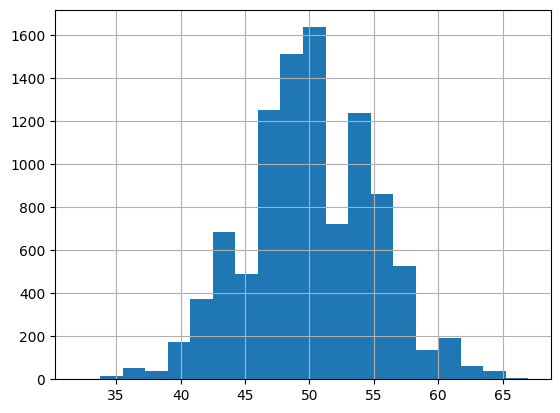

In [34]:
heads = pd.DataFrame(outcomes, columns=["Heads"])
heads['Heads'].hist(bins=20)

back to slides

## Chance

### Probability Question
$$P(\text{Queen first}) = \frac{1}{3}$$

$$P(\text{King second}|\text{Queen first}) = \frac{1}{2}$$

$$P(Q \rightarrow K) = \frac{1}{3} \times \frac{1}{2} = \frac{1}{6} \approx 0.1667$$

In [35]:
cards = ["A", "K", "Q"]
N = 100_000  # simulations
count = 0

for _ in range(N):
    draw = np.random.choice(cards, size=2, replace=False)
    if list(draw) == ["Q", "K"]:
        count += 1

prob_estimate = count / N
print("P( Q → K (simulation)):", prob_estimate)

P( Q → K (simulation)): 0.16717


### Heads and Tails question

In [36]:
# Settings
N = 100_000  # number of simulations
sides = ["Heads", "Tails"]  # Heads and Tails

# Simulation: generate a N x 3 matrix of random coin tosses
simulations = np.random.choice(sides, size=(N, 3))

# Check if there is at least one "H" in each row
at_least_one_heads = np.any(simulations == "Heads", axis=1)

# Calculate the estimated probability
estimated_prob = np.mean(at_least_one_heads)
print("Estimated probability of at least one Heads in 3 tosses:", estimated_prob)

Estimated probability of at least one Heads in 3 tosses: 0.87335


In [37]:
# Settings
N = 100_000  # number of simulations
sides = ["Heads", "Tails"]  # Heads and Tails

# Simulation: generate a N x 3 matrix of random coin tosses
simulations = np.random.choice(sides, size=(N, 10))

# Check if there is at least one "H" in each row
at_least_one_heads = np.any(simulations == "Heads", axis=1)

# Calculate the estimated probability
estimated_prob = np.mean(at_least_one_heads)
print("Estimated probability of at least one Heads in 10 tosses:", estimated_prob)

Estimated probability of at least one Heads in 10 tosses: 0.99897


## The Monty Hall Problem

In [38]:
doors = ['car', 'first goat', 'second goat']
doors

['car', 'first goat', 'second goat']

In [39]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [40]:
[other_goat('first goat'), other_goat('second goat')]

['second goat', 'first goat']

In [41]:
def monty_hall():
    """Return
    [contestant's guess, what Monty reveals, what remains behind the other door]"""

    contestant_choice = np.random.choice(doors)

    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_choice = 'car'

    if contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_choice = 'car'

    if contestant_choice == 'car':
        monty_choice = np.random.choice(doors)
        remaining_choice = other_goat(monty_choice)

    return [contestant_choice, monty_choice, remaining_choice]

In [42]:
results = pd.DataFrame(columns=['Guess', 'Revealed', 'Remaining'])

In [43]:
monty_hall()

[np.str_('car'), np.str_('first goat'), 'second goat']

In [44]:
for i in range(10000):
    results.loc[i] = monty_hall()

<Axes: title={'center': 'Count by Remaining'}, xlabel='Remaining', ylabel='Count'>

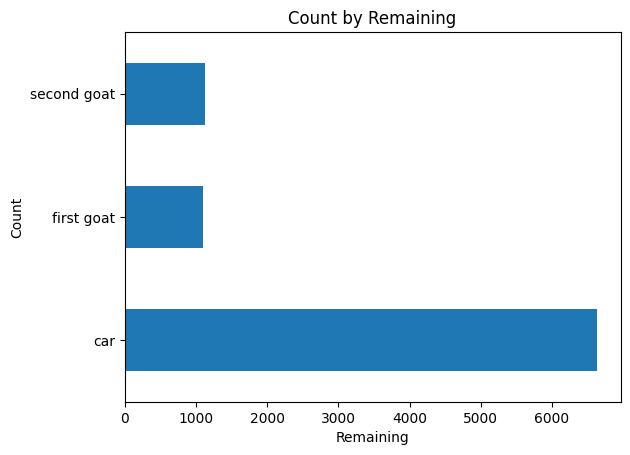

In [45]:
counts = results.groupby('Remaining').size()
counts.plot(kind='barh', xlabel='Remaining', ylabel='Count', title='Count by Remaining')

<Axes: title={'center': 'Count by Guess'}, xlabel='Remaining', ylabel='Count'>

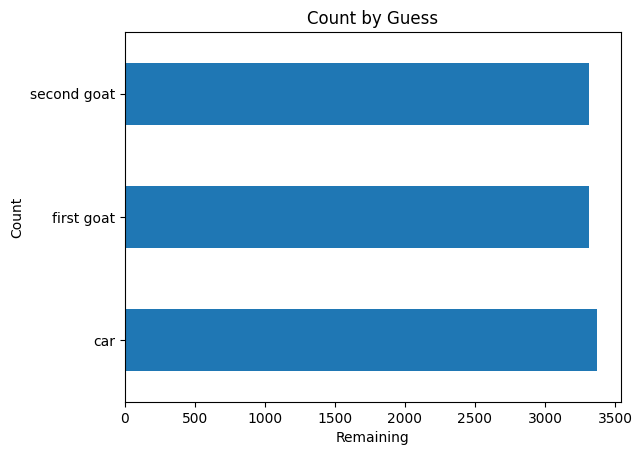

In [46]:
counts = results.groupby('Guess').size()
counts.plot(kind='barh', xlabel='Remaining', ylabel='Count', title='Count by Guess')

Estimated probability of winning if switching: 0.665 (~2/3)
Estimated probability of winning if staying: 0.335 (~1/3)


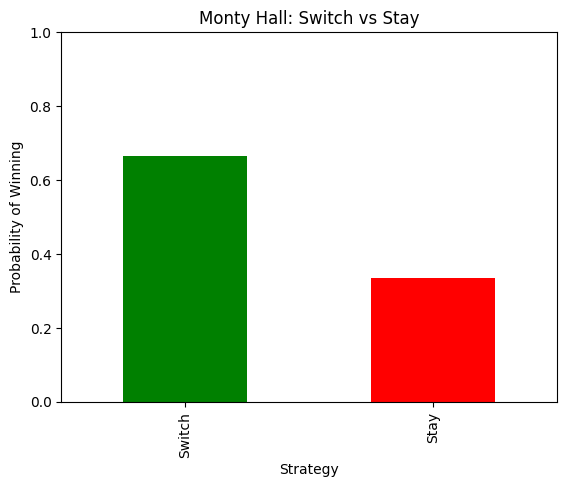

In [47]:
# Function to simulate one round of the Monty Hall game
def monty_hall():
    """
    Returns a tuple of:
    (initial_guess, revealed_goat, remaining_door, car_door)
    """
    doors = [0, 1, 2]  # Doors labeled 0,1,2
    car = np.random.choice(doors)  # Randomly place the car behind a door
    guess = np.random.choice(doors)  # Player's initial guess

    # Monty opens a door with a goat (not the player's guess and not the car)
    revealed = np.random.choice([d for d in doors if d != guess and d != car])

    # The remaining closed door the player can switch to
    remaining = [d for d in doors if d != guess and d != revealed][0]

    return guess, revealed, remaining, car

# Number of simulations
N = 100_000

# Run the simulations and store results
results_list = [monty_hall() for _ in range(N)]

# Convert results to a pandas DataFrame
results = pd.DataFrame(results_list, columns=['Guess', 'Revealed', 'Remaining', 'Car'])

# Determine if the player would win if they switch
results['Win_if_switch'] = results['Remaining'] == results['Car']

# Determine if the player would win if they stay
results['Win_if_stay'] = results['Guess'] == results['Car']

# Calculate estimated probabilities
prob_switch = results['Win_if_switch'].mean()
prob_stay = results['Win_if_stay'].mean()

# Print the results
print(f"Estimated probability of winning if switching: {prob_switch:.3f} (~2/3)")
print(f"Estimated probability of winning if staying: {prob_stay:.3f} (~1/3)")

# Optional: visualize the results
import matplotlib.pyplot as plt

results_summary = pd.DataFrame({
    'Strategy': ['Switch', 'Stay'],
    'Winning Probability': [prob_switch, prob_stay]
})

results_summary.plot(x='Strategy', y='Winning Probability', kind='bar', legend=False, ylim=(0,1), color=['green','red'])
plt.ylabel("Probability of Winning")
plt.title("Monty Hall: Switch vs Stay")
plt.show()


In [48]:
united = pd.read_csv("data/united.csv")

united.head()

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64


In [49]:
united.loc[united['Destination']=='JFK']

,Date,Flight Number,Destination,Delay
26,6/1/15,502,JFK,-4
33,6/1/15,637,JFK,141
39,6/1/15,704,JFK,-8
50,6/1/15,758,JFK,-5
51,6/1/15,760,JFK,352
...,...,...,...,...
13716,8/31/15,704,JFK,9
13720,8/31/15,758,JFK,-2
13721,8/31/15,760,JFK,-5
13724,8/31/15,824,JFK,0


In [50]:
np.arange(0, len(united), 1000)

array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
        9000, 10000, 11000, 12000, 13000])

In [51]:
united.iloc[np.arange(0, len(united), 1000)]

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


In [52]:
united.iloc[[34, 6321, 10040]]

,Date,Flight Number,Destination,Delay
34,6/1/15,650,AUS,44
6321,7/13/15,1124,SEA,-7
10040,8/6/15,1216,LAS,2


A random sample:

In [53]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.iloc[np.arange(start, len(united), 1000)]
systematic_sample

,Date,Flight Number,Destination,Delay
638,6/5/15,560,DFW,-2
1638,6/11/15,1751,LAS,72
2638,6/18/15,1185,EWR,57
3638,6/25/15,427,OGG,-5
4638,7/1/15,1937,IAH,2
5638,7/8/15,1927,IAH,-3
6638,7/15/15,1111,EWR,-5
7638,7/22/15,249,IAD,9
8638,7/28/15,1263,MCO,9
9638,8/4/15,273,SEA,-8


1. Systematic sampling selects rows at regular intervals (for example, every 1000th row) after a random starting point. This ensures evenly spaced samples across the dataset.

In [54]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.iloc[np.arange(start, len(united), 1000)]

In [55]:
systematic_sample

,Date,Flight Number,Destination,Delay
172,6/2/15,444,BOS,-7
1172,6/8/15,1914,IAH,4
2172,6/15/15,1199,SEA,43
3172,6/22/15,455,BOS,15
4172,6/28/15,1692,EWR,3
5172,7/6/15,72,LAX,12
6172,7/12/15,1122,HNL,14
7172,7/18/15,2000,PHX,4
8172,7/25/15,1004,LAX,-3
9172,7/31/15,1900,PHL,-1


2. Random sampling using DataFrame.sample() chooses rows completely at random. It does not guarantee evenly spaced intervals, only a random subset.

In [56]:
random_sample = united.sample(frac=0.001, random_state=42)

In [57]:
random_sample

,Date,Flight Number,Destination,Delay
4950,7/4/15,492,LAS,-8
5579,7/8/15,1216,LAS,65
4860,7/3/15,724,ORD,0
5653,7/9/15,73,HNL,93
4640,7/1/15,1944,EWR,-5
3316,6/23/15,325,BOS,17
6550,7/14/15,1914,IAH,131
12168,8/20/15,1109,DEN,-1
168,6/2/15,408,IAD,-2
13101,8/26/15,1922,EWR,-1


Key difference: `iloc` with `np.arange()` produces systematic samples (regular intervals), while `sample()` produces random samples (unstructured). Use the first for systematic studies and the second for unbiased randomness.

## Distributions

In [58]:
die = pd.DataFrame({'Face': np.arange(1, 7)})
die

,Face
0,1
1,2
2,3
3,4
4,5
5,6


In [59]:
die.sample(10, replace=True)

,Face
3,4
4,5
3,4
2,3
2,3
1,2
0,1
2,3
1,2
3,4


array([[<Axes: title={'center': 'Face'}>]], dtype=object)

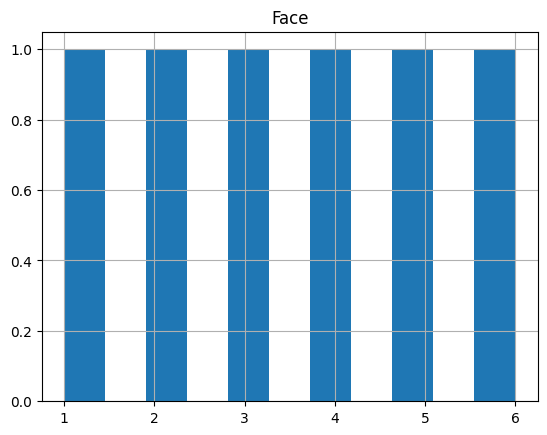

In [60]:
die.hist(bins=11)

In [61]:
roll_bins = np.arange(0.5, 6.6, 1)

array([[<Axes: title={'center': 'Face'}>]], dtype=object)

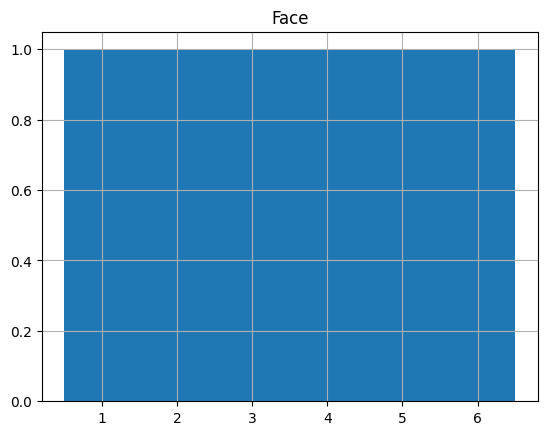

In [62]:
die.hist(bins=roll_bins)

array([[<Axes: title={'center': 'Face'}>]], dtype=object)

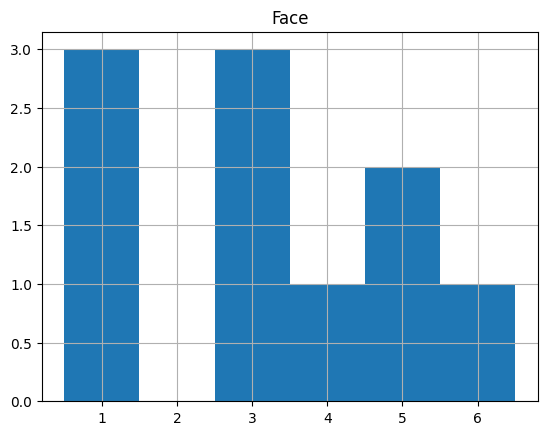

In [63]:
die.sample(10, replace=True).hist(bins=roll_bins)

array([[<Axes: title={'center': 'Face'}>]], dtype=object)

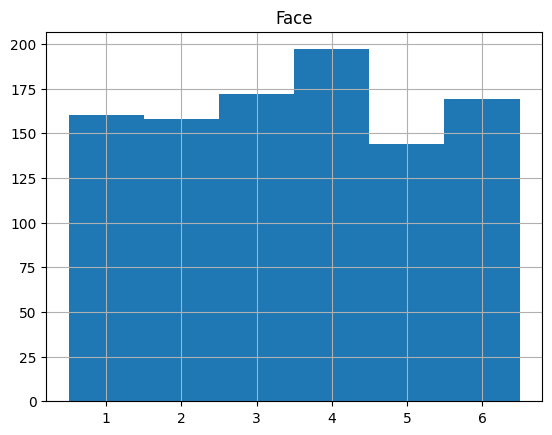

In [64]:
die.sample(1000, replace=True).hist(bins=roll_bins)

array([[<Axes: title={'center': 'Face'}>]], dtype=object)

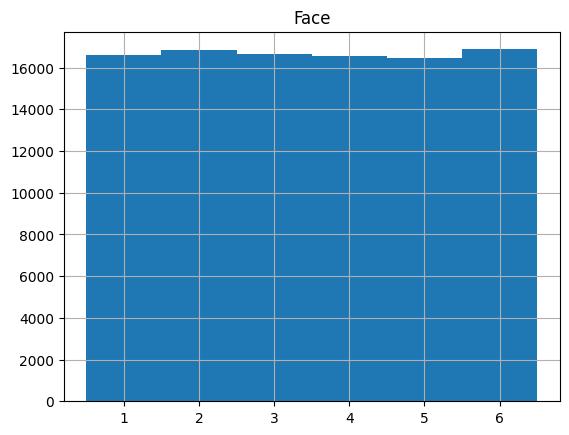

In [65]:
die.sample(100000, replace=True).hist(bins=roll_bins)

## Large Random Samples

In [66]:
united

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


array([[<Axes: title={'center': 'Delay'}>]], dtype=object)

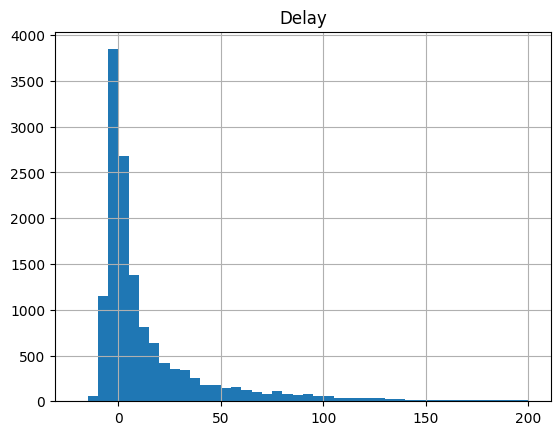

In [67]:
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins = united_bins)

In [68]:
united['Delay'].min()

np.int64(-16)

In [69]:
united['Delay'].max()

np.int64(580)

In [70]:
united['Delay'].mean()

np.float64(16.658155515370705)

array([[<Axes: title={'center': 'Delay'}>]], dtype=object)

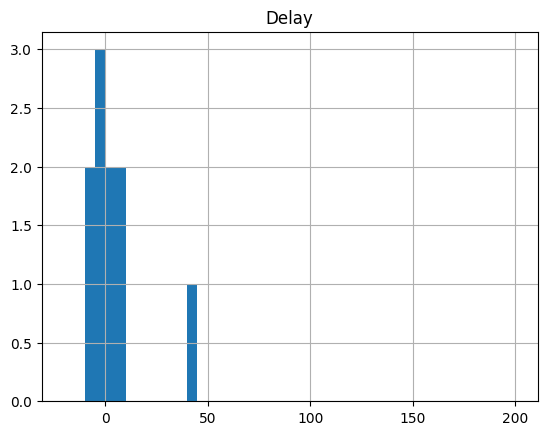

In [71]:
united.sample(10).hist('Delay', bins = united_bins)

array([[<Axes: title={'center': 'Delay'}>]], dtype=object)

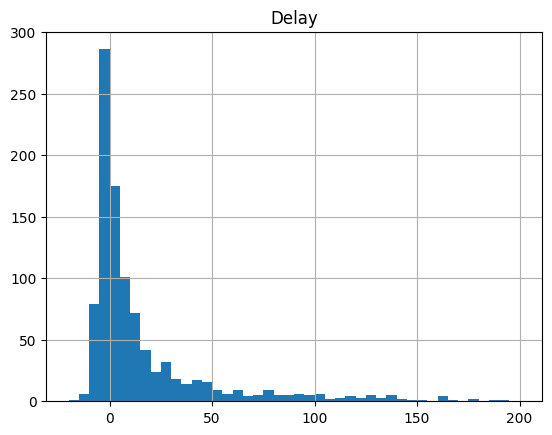

In [72]:
united.sample(1000).hist('Delay', bins = united_bins)

back to slides

## Simulating Statistics

In [73]:
united['Delay'].median()

np.float64(2.0)

In [74]:
united.sample(10)['Delay'].median()

np.float64(1.0)

In [75]:
def sample_median(size):
    return united.sample(10)['Delay'].median()

In [76]:
sample_median(10)

np.float64(-2.0)

back to slides

In [77]:
sample_medians = []

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

array([[<Axes: title={'center': 'Sample medians'}>]], dtype=object)

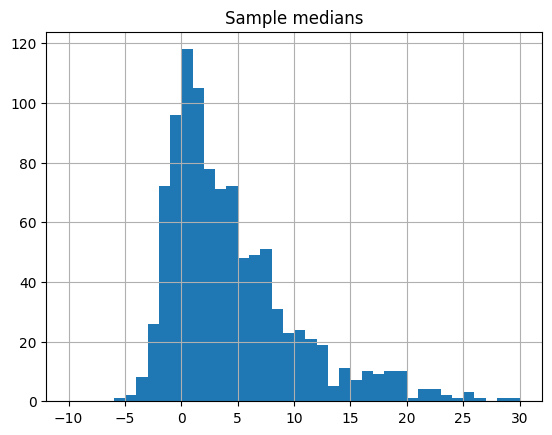

In [78]:
pd.DataFrame({'Sample medians': sample_medians}).hist(bins=np.arange(-10, 31))

In [79]:
sample_medians = []

for i in np.arange(1000):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

array([[<Axes: title={'center': 'Sample medians'}>]], dtype=object)

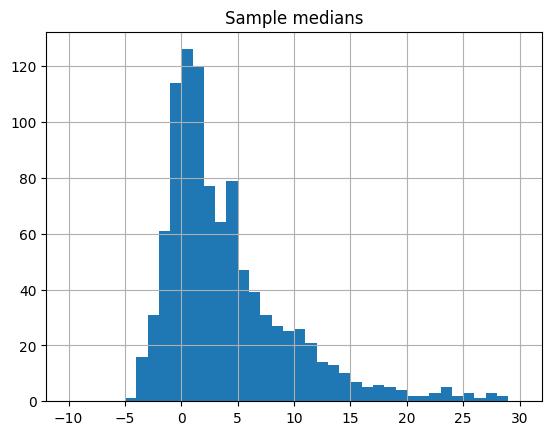

In [80]:
pd.DataFrame({'Sample medians': sample_medians}).hist(bins=np.arange(-10, 31))

## Swain vs. Alabama

In [81]:
population_proportions = np.array([0.26, 0.74])
population_proportions

array([0.26, 0.74])

In [82]:
sample = np.random.choice(
    [0, 1],                # two categories
    size=100,              # sample size
    p=population_proportions  # probabilities
)

In [83]:
sample_proportions = pd.Series(sample).value_counts(normalize=True)
sample_proportions

1    0.68
0    0.32
Name: proportion, dtype: float64

In [84]:
def panel_proportion():
    sample = np.random.choice(
        [0, 1],
        size=100,
        p=population_proportions
    )
    sample_proportions = pd.Series(sample).value_counts(normalize=True)
    return sample_proportions.get(0, 0)

In [85]:
panel_proportion()

np.float64(0.29)

In [86]:
panels = []

for i in np.arange(10_000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

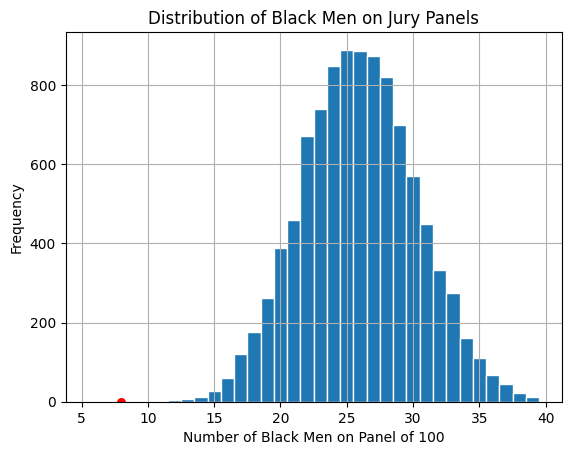

In [87]:
df = pd.DataFrame({'Number of Black Men on Panel of 100': panels})
ax = df['Number of Black Men on Panel of 100'].hist(bins=np.arange(5.5, 40), density=False, edgecolor='w')

plt.scatter(8, 0, color='red', s=30)

plt.xlabel('Number of Black Men on Panel of 100')
plt.ylabel('Frequency')
plt.title('Distribution of Black Men on Jury Panels')
plt.show()

## Mendel and Pea Flowers

In [88]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [89]:
predicted_proportions = np.array([0.75, 0.25])

sample = np.random.choice(
    [0, 1],                 # two categories
    size=929,               # sample size
    p=predicted_proportions  # probabilities
)

In [90]:
sample_proportions = pd.Series(sample).value_counts(normalize=True)
sample_proportions

0    0.779333
1    0.220667
Name: proportion, dtype: float64

In [91]:
def purple_flowers():
    sample = np.random.choice(
        [0, 1],
        size=929,
        p=predicted_proportions
    )
    sample_props = pd.Series(sample).value_counts(normalize=True)
    return sample_props.get(0, 0) * 100  # proportion of category 0 as a percentage

In [92]:
purple_flowers()

np.float64(76.53390742734123)

In [93]:
purples = []

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)



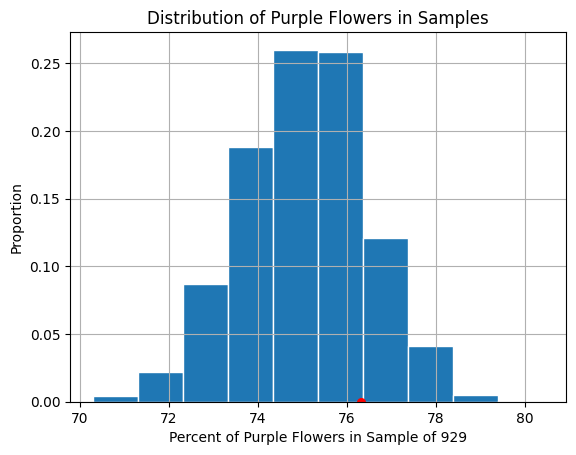

In [94]:
df = pd.DataFrame({'Percent of purple flowers in sample of 929': purples})
ax = df['Percent of purple flowers in sample of 929'].hist(density=True, edgecolor='w')

plt.scatter(observed_purples * 100, 0, color='red', s=30)

plt.xlabel('Percent of Purple Flowers in Sample of 929')
plt.ylabel('Proportion')
plt.title('Distribution of Purple Flowers in Samples')
plt.show()

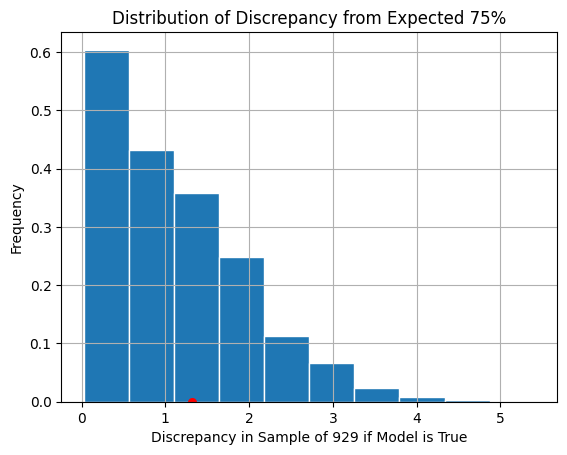

In [95]:
df = pd.DataFrame({'Discrepancy in sample of 929 if the model is true': np.abs(purples - 75)})

ax = df['Discrepancy in sample of 929 if the model is true'].hist(density=True, edgecolor='w')

plt.scatter(np.abs(observed_purples * 100 - 75), 0, color='red', s=30)

plt.xlabel('Discrepancy in Sample of 929 if Model is True')
plt.ylabel('Frequency')
plt.title('Distribution of Discrepancy from Expected 75%')
plt.show()


In [96]:
abs(observed_purples * 100 - 75)

1.318622174381062

back to slides

## Alameda County Jury Panels

In [97]:
jury = pd.DataFrame({
    'Ethnicity': ['Asian', 'Black', 'Latino', 'White', 'Other'],
    'Eligible': [0.15, 0.18, 0.12, 0.54, 0.01],
    'Panels': [0.26, 0.08, 0.08, 0.54, 0.04]
})

jury

,Ethnicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


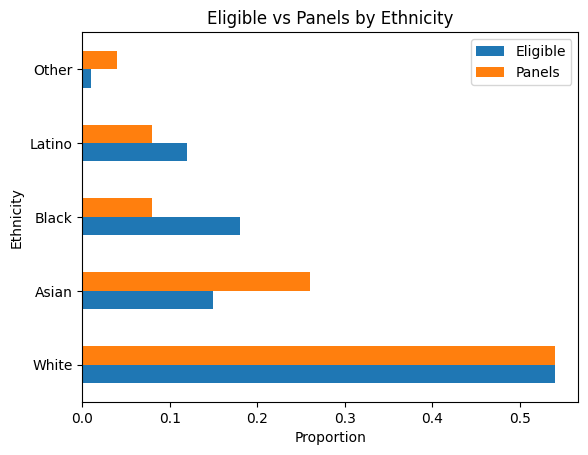

In [98]:
jury.sort_values(by='Panels', ascending=False).set_index('Ethnicity')[['Eligible', 'Panels']].plot(kind='barh')
plt.xlabel('Proportion')
plt.title('Eligible vs Panels by Ethnicity')
plt.show()

In [99]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = [0.15, 0.18, 0.12, 0.54, 0.01]

# Simulate a random draw of 1423 jurors according to the model proportions
simulated = np.random.choice(
    np.arange(len(model)),   # categories (0, 1, 2, ...)
    size=1423,               # sample size
    p=model                  # probabilities for each category
)

# Calculate the sample proportions
simulated_proportions = pd.Series(simulated).value_counts(normalize=True)
simulated_proportions

3    0.559382
1    0.174982
0    0.142656
2    0.112439
4    0.010541
Name: proportion, dtype: float64

In [100]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!

jury_with_simulated = jury.copy()
jury_with_simulated['Simulated'] = simulated_proportions.values  # align values by category

jury_with_simulated


,Ethnicity,Eligible,Panels,Simulated
0,Asian,0.15,0.26,0.559382
1,Black,0.18,0.08,0.174982
2,Latino,0.12,0.08,0.142656
3,White,0.54,0.54,0.112439
4,Other,0.01,0.04,0.010541


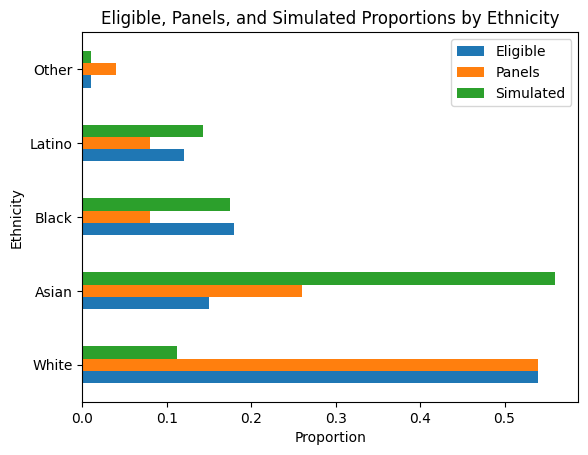

In [101]:
jury_with_simulated.sort_values(by='Panels', ascending=False).set_index('Ethnicity')[['Eligible', 'Panels', 'Simulated']].plot(kind='barh')
plt.xlabel('Proportion')
plt.title('Eligible, Panels, and Simulated Proportions by Ethnicity')
plt.show()

back to slides

## Distance Between Distributions

In [102]:
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury['Panels'] - jury['Eligible']
jury_with_difference = jury.copy()
jury_with_difference['Difference'] = diffs
jury_with_difference

,Ethnicity,Eligible,Panels,Difference
0,Asian,0.15,0.26,0.11
1,Black,0.18,0.08,-0.10
2,Latino,0.12,0.08,-0.04
3,White,0.54,0.54,0.00
4,Other,0.01,0.04,0.03


back to slides

## Total Variation Distance

In [103]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [104]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury['Panels'], jury['Eligible'])
obsvd_tvd

0.14

In [105]:
# Simulate a random draw of 1423 jurors according to the model
sample = np.random.choice(
    np.arange(len(model)),  # categories
    size=1423,
    p=model                  # model probabilities
)

# Calculate the sample proportions
sample_props = pd.Series(sample).value_counts(normalize=True).sort_index()

# Compute Total Variation Distance (TVD) from the expected values
tvd_value = np.sum(np.abs(sample_props.values - jury['Eligible'].values)) / 2
tvd_value

np.float64(0.02558678847505274)

In [106]:
def simulated_tvd():
    sample = np.random.choice(
        np.arange(len(model)),  # categories
        size=1423,
        p=model                  # model probabilities
    )
    # Calculate sample proportions
    sample_props = pd.Series(sample).value_counts(normalize=True).sort_index()
    # Compute TVD from the model
    return np.sum(np.abs(sample_props.values - model)) / 2

In [107]:
tvds = []

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

Observed TVD: 0.14


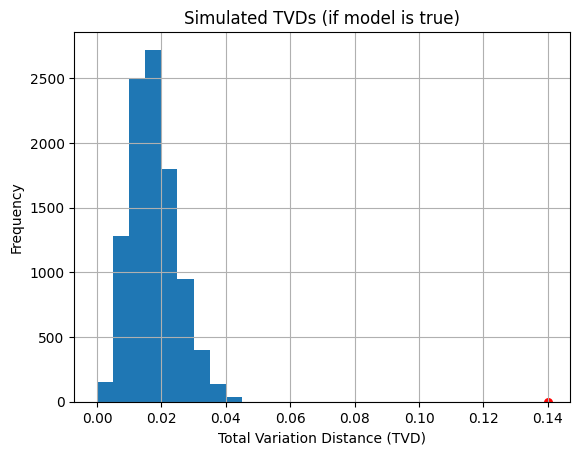

In [108]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

df = pd.DataFrame({title: tvds})
ax = df[title].hist(bins=bins)
print('Observed TVD: ' + str(obsvd_tvd))

# Plotting details; ignore this code

plt.scatter(obsvd_tvd, 0, color='red', s=30)
plt.xlabel('Total Variation Distance (TVD)')
plt.ylabel('Frequency')
plt.title('Simulated TVDs (if model is true)')
plt.show()

back to slides

## The GSI's Defense

In [109]:
scores = pd.read_csv("data/scores.csv")
scores

,Section,Midterm
0,1,22
1,2,12
2,2,23
3,2,14
4,1,20
...,...,...
354,5,24
355,2,16
356,2,17
357,12,16


In [110]:
scores['Section'].value_counts()

Section
10    34
5     33
1     32
2     32
6     32
4     30
9     30
12    30
8     29
3     27
11    26
7     24
Name: count, dtype: int64

In [111]:
scores.groupby('Section').count()

,Midterm
Section,
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30


In [112]:
scores.groupby('Section').mean()

,Midterm
Section,
1,15.593750
2,15.125000
3,13.666667
4,14.766667
5,17.454545
6,15.031250
7,16.625000
8,16.310345
9,14.566667


In [113]:
observed_average = 13.6667

In [114]:
random_sample = scores.sample(27, replace=False)
random_sample

,Section,Midterm
20,6,11
25,1,13
53,8,0
220,6,11
312,11,11
340,10,23
243,7,17
254,6,20
62,11,19
44,1,13


In [115]:
np.average(random_sample['Midterm'])

np.float64(15.518518518518519)

In [116]:
def random_sample_midterm_avg():
    # Take a random sample of 27 rows without replacement
    random_sample = scores.sample(n=27, replace=False)
    # Compute the average of the 'Midterm' column
    return random_sample['Midterm'].mean()


In [117]:
# Simulate 50,000 copies of the test statistic

sample_averages = []

for i in np.arange(50000):
    sample_averages = np.append(sample_averages, random_sample_midterm_avg())

In [118]:
averages_tbl = pd.DataFrame({'Random Sample Average': sample_averages})

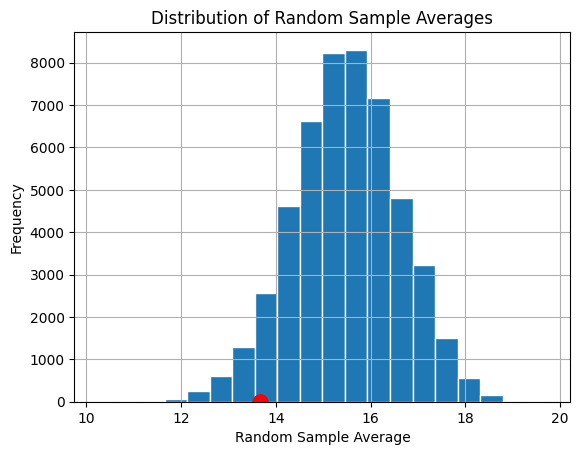

In [119]:
ax = averages_tbl['Random Sample Average'].hist(bins=20, edgecolor='w')
plt.scatter(observed_average, -0.01, color='red', s=120)
plt.xlabel('Random Sample Average')
plt.ylabel('Frequency')
plt.title('Distribution of Random Sample Averages')
plt.show()

back to slides

## Conventions About Inconsistency

### Approach 1

In [120]:
# (1) Calculate the p-value: simulation area beyond observed value
np.count_nonzero(sample_averages <= observed_average) / 50000
# (2) See if this is less than 5%


0.05632

### Approach 2

In [121]:
# (1) Find simulated value corresponding to 5% of 50,000 = 2500
five_percent_point = averages_tbl.sort_values(by='Random Sample Average').iloc[2499, 0]
five_percent_point

np.float64(13.62962962962963)

In [122]:
# (2) See if this value is greater than observed value
observed_average

13.6667

### Visual Representation

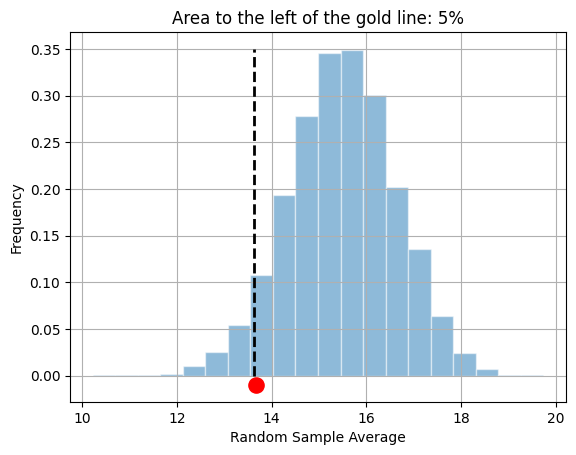

In [123]:
ax = averages_tbl['Random Sample Average'].hist(bins=20, alpha=0.5, edgecolor='w', density=True)
plt.plot([five_percent_point, five_percent_point], [0, 0.35], color='black', lw=2, linestyle='--')
plt.title('Area to the left of the gold line: 5%')
plt.scatter(observed_average, -0.01, color='red', s=120)

plt.xlabel('Random Sample Average')
plt.ylabel('Frequency')
plt.show()

back to slides

## Comparing Two Samples

In [124]:
births = pd.read_csv("data/baby.csv")
births

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


In [125]:
births.groupby('Maternal Smoker').count()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
Maternal Smoker,,,,,
False,715,715,715,715,715
True,459,459,459,459,459


In [126]:
smoking_and_birthweight = births[['Maternal Smoker', 'Birth Weight']]
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


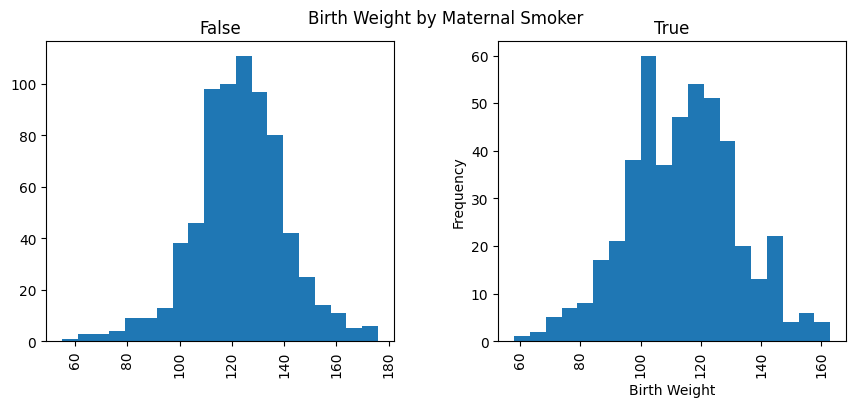

In [127]:
smoking_and_birthweight.hist(column='Birth Weight', by='Maternal Smoker', bins=20, figsize=(10,4))

plt.suptitle('Birth Weight by Maternal Smoker')  # Add a main title
plt.xlabel('Birth Weight')
plt.ylabel('Frequency')
plt.show()

## Test Statistic
**Question** What values of our statistic are in favor of the alternative: positive or negative?

In [128]:
means_table = smoking_and_birthweight.groupby('Maternal Smoker').mean().reset_index()
means_table



,Maternal Smoker,Birth Weight
0,False,123.085315
1,True,113.819172


In [129]:
means_table.T

,0,1
Maternal Smoker,False,True
Birth Weight,123.085315,113.819172


In [130]:
means = means_table['Birth Weight']
observed_difference = means.iloc[1] - means.iloc[0]
observed_difference

np.float64(-9.266142572024918)

In [131]:
def difference_of_means(table, numeric_label, category_label):
    """
    Takes:
       - table: a pandas DataFrame
       - numeric_label: column name of the numerical variable
       - category_label: column name of the categorical variable

    Returns the difference of means of the two groups
    """
    # Select only the relevant columns
    reduced = table[[numeric_label, category_label]]

    # Compute group means
    means_table = reduced.groupby(category_label)[numeric_label].mean().reset_index()

    # Extract the means column
    means = means_table[numeric_label]

    # Return difference between the two groups
    return means.iloc[1] - means.iloc[0]

In [132]:
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')

np.float64(-9.266142572024918)

back to slides

## Random Permutaton (Shuffling)

In [133]:
staff = pd.DataFrame({
    'Names': ['Jim', 'Pam', 'Dwight', 'Michael'],
    'Ages': [29, 28, 34, 41]}
)


In [134]:
staff

,Names,Ages
0,Jim,29
1,Pam,28
2,Dwight,34
3,Michael,41


In [136]:
staff.sample()

,Names,Ages
2,Dwight,34


In [139]:
staff.sample(n=4)

,Names,Ages
0,Jim,29
1,Pam,28
3,Michael,41
2,Dwight,34


In [141]:
staff.sample(n=4, replace=True)

,Names,Ages
0,Jim,29
1,Pam,28
3,Michael,41
1,Pam,28


In [142]:
staff['Shuffled'] = staff.iloc[:, 0].sample(frac=1, replace=False).reset_index(drop=True)
staff

,Names,Ages,Shuffled
0,Jim,29,Dwight
1,Pam,28,Michael
2,Dwight,34,Pam
3,Michael,41,Jim


back to slides

## Simulating Under the Null

In [143]:
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [144]:
# frac: fraction of dataframe (1 = 100%)
shuffled_labels = smoking_and_birthweight['Maternal Smoker'].sample(frac=1, replace=False).reset_index(drop=True)

shuffled_labels


0       False
1       False
2        True
3        True
4       False
        ...  
1169    False
1170     True
1171    False
1172     True
1173    False
Name: Maternal Smoker, Length: 1174, dtype: bool

In [145]:
# Add the shuffled labels as a new column
original_and_shuffled = smoking_and_birthweight.copy()
original_and_shuffled['Shuffled Label'] = shuffled_labels

In [146]:
original_and_shuffled

,Maternal Smoker,Birth Weight,Shuffled Label
0,False,120,False
1,False,113,False
2,True,128,True
3,True,108,True
4,False,136,False
...,...,...,...
1169,False,113,False
1170,False,128,True
1171,True,130,False
1172,False,125,True


In [147]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Shuffled Label')

np.float64(-1.3818821701174642)

In [148]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Maternal Smoker')

np.float64(-9.266142572024918)

## Permutation Test

In [149]:
def one_simulated_difference(table, numeric_label, category_label):
    """
    Takes:
       - table: a pandas DataFrame
       - numeric_label: column name of numerical variable
       - category_label: column name of categorical variable

    Returns: Difference of means of the two groups after shuffling labels
    """
    # Shuffle the category labels
    shuffled_labels = table[category_label].sample(frac=1, replace=False).reset_index(drop=True)

    # Create a new DataFrame with numeric column and shuffled labels
    shuffled_table = table[[numeric_label]].copy()
    shuffled_table['Shuffled Label'] = shuffled_labels

    # Compute difference of means using the shuffled labels
    return difference_of_means(shuffled_table, numeric_label, 'Shuffled Label')

In [150]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

np.float64(0.7394274570745267)

In [151]:
differences = []

for i in np.arange(2500):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

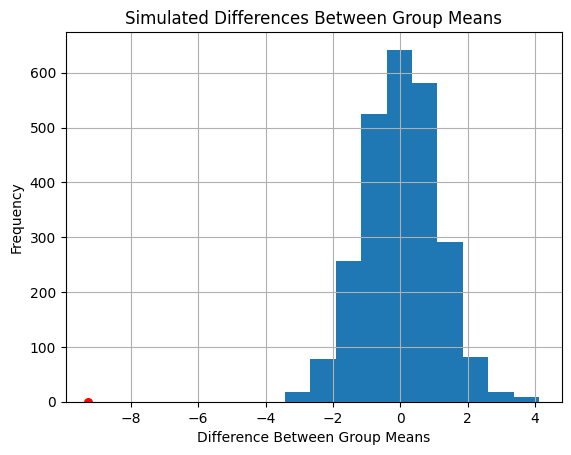

In [152]:
df = pd.DataFrame({'Difference Between Group Means': differences})
ax = df['Difference Between Group Means'].hist()

plt.scatter(observed_difference, 0, color='red', s=30)
plt.xlabel('Difference Between Group Means')
plt.ylabel('Frequency')
plt.title('Simulated Differences Between Group Means')
plt.show()